# FIFA 2018 Team Performance Analysis using Factor Analysis

In [45]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
df = pd.read_csv(r"FIFA 2018 Statistics.csv")
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [47]:
df = df[['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
          'Off-Target', 'Blocked', 'Corners', 'Offsides', 
          'Free Kicks', 'Saves', 'Pass Accuracy %', 
          'Passes', 'Distance Covered (Kms)', 'Fouls Committed']]
df.dropna(inplace=True)
df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Goal Scored             128 non-null    int64
 1   Ball Possession %       128 non-null    int64
 2   Attempts                128 non-null    int64
 3   On-Target               128 non-null    int64
 4   Off-Target              128 non-null    int64
 5   Blocked                 128 non-null    int64
 6   Corners                 128 non-null    int64
 7   Offsides                128 non-null    int64
 8   Free Kicks              128 non-null    int64
 9   Saves                   128 non-null    int64
 10  Pass Accuracy %         128 non-null    int64
 11  Passes                  128 non-null    int64
 12  Distance Covered (Kms)  128 non-null    int64
 13  Fouls Committed         128 non-null    int64
dtypes: int64(14)
memory usage: 14.1 KB


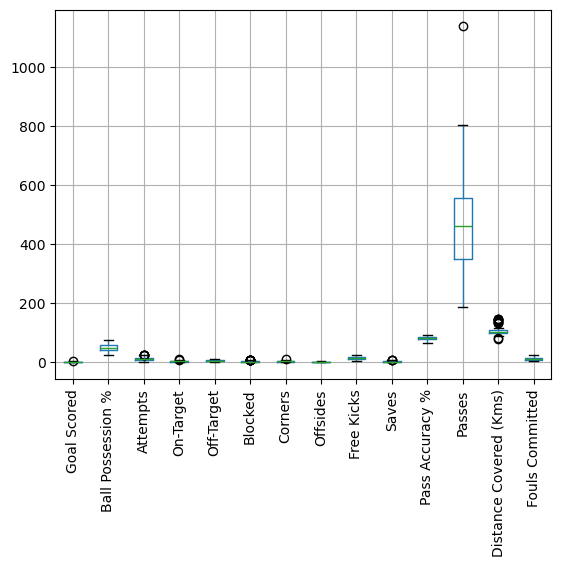

In [49]:
# Boxplot pre-winsorizing
df.boxplot(column=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
                   'Off-Target', 'Blocked', 'Corners', 'Offsides', 
                   'Free Kicks', 'Saves', 'Pass Accuracy %', 
                   'Passes', 'Distance Covered (Kms)', 'Fouls Committed'])
plt.xticks(rotation=90)
plt.show()

In [50]:
# Winsorize
for i in df:                  # where, i = column name 
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr  
        df[i].clip(lower=ll,upper=ul,inplace=True)

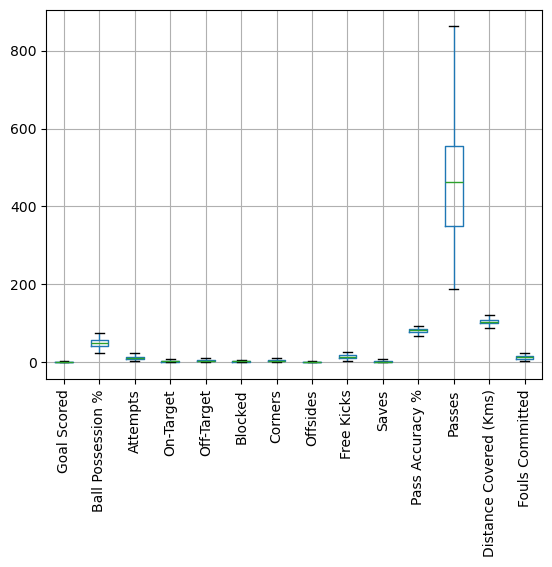

In [51]:
# Boxplot withotu outliers
df.boxplot(column=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
                   'Off-Target', 'Blocked', 'Corners', 'Offsides', 
                   'Free Kicks', 'Saves', 'Pass Accuracy %', 
                   'Passes', 'Distance Covered (Kms)', 'Fouls Committed'])
plt.xticks(rotation=90)
plt.show()

In [52]:
# Correlation analysis
Correlation = df.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed
Goal Scored,1.000000,0.030294,0.161346,0.448390,-0.014307,-0.065761,0.048453,0.036568,0.050807,-0.118179,0.125691,0.045429,0.015560,0.030422
Ball Possession %,0.030294,1.000000,0.537428,0.305872,0.361767,0.512282,0.543148,0.057706,0.273831,-0.290912,0.713872,0.893051,-0.057753,-0.296477
Attempts,0.161346,0.537428,1.000000,0.734102,0.722941,0.740064,0.689015,-0.010844,0.141112,-0.272777,0.394588,0.577317,0.160746,-0.245600
On-Target,0.448390,0.305872,0.734102,1.000000,0.323845,0.318424,0.419202,0.065022,0.092074,-0.334367,0.298987,0.344259,0.079775,-0.192600
Off-Target,-0.014307,0.361767,0.722941,0.323845,1.000000,0.309082,0.442576,-0.095919,0.142367,-0.125749,0.189760,0.416439,0.206017,-0.186858
Blocked,-0.065761,0.512282,0.740064,0.318424,0.309082,1.000000,0.634514,0.027979,0.102735,-0.140926,0.401824,0.515688,0.077795,-0.178883
Corners,0.048453,0.543148,0.689015,0.419202,0.442576,0.634514,1.000000,-0.032371,0.086545,-0.234897,0.331289,0.546354,0.093086,-0.165851
Offsides,0.036568,0.057706,-0.010844,0.065022,-0.095919,0.027979,-0.032371,1.000000,0.089121,0.008342,0.127421,0.040994,0.048981,-0.040084
Free Kicks,0.050807,0.273831,0.141112,0.092074,0.142367,0.102735,0.086545,0.089121,1.000000,-0.230425,0.131951,0.169038,-0.022224,0.080341
Saves,-0.118179,-0.290912,-0.272777,-0.334367,-0.125749,-0.140926,-0.234897,0.008342,-0.230425,1.000000,-0.190546,-0.257320,0.124598,0.072320


In [53]:
# Bartlett’s test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Bartlett's test chi-square value:", chi_square_value, "p-value:", p_value)

Bartlett's test chi-square value: 1151.0149996497994 p-value: 4.64965040137732e-183


In [54]:
# KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print("KMO model value:", kmo_model)

KMO model value: 0.5870317550689234


In [55]:
# Factor analysis
fa = FactorAnalyzer(rotation='varimax', method="principal")
fa.fit(df)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [56]:
# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
print("Eigenvalues:\n", eigen_values)

Eigenvalues:
 [4.87147711 1.51236466 1.40267523 1.13102181 1.08372076 0.84397763
 0.82021216 0.70418258 0.56569249 0.41065249 0.3338716  0.23440577
 0.076833   0.00891272]


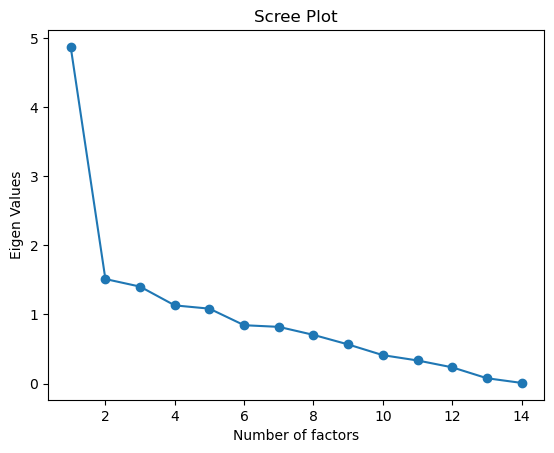

In [57]:
# Scree plot
dd = pd.DataFrame(eigen_values, columns=["Eigen_Values"])
dd['Factor'] = range(1, len(eigen_values) + 1)
plt.plot('Factor', 'Eigen_Values', data=dd, linestyle='-', marker='o')
plt.xlabel("Number of factors")
plt.ylabel("Eigen Values")
plt.title("Scree Plot")
plt.show()

In [58]:
# Loadings and variance
model = FactorAnalyzer(n_factors=3, rotation='varimax', method="principal").fit(df)
loading = pd.DataFrame(model.loadings_, columns=["Factor1", "Factor2", "Factor3"], index=df.columns)
loading.style.applymap(lambda x: 'background-color : yellow' if abs(x) > 0.5 else '')


,Factor1,Factor2,Factor3
Goal Scored,-0.215216,0.038781,0.775184
Ball Possession %,0.880342,0.121039,0.216495
Attempts,0.471209,0.749391,0.372198
On-Target,0.153423,0.457310,0.724824
Off-Target,0.301271,0.691706,0.068463
Blocked,0.585274,0.503272,0.046483
Corners,0.513657,0.578164,0.175573
Offsides,0.105665,-0.207702,0.175908
Free Kicks,0.193144,-0.081267,0.339711
Saves,-0.230098,0.026068,-0.559344


In [62]:
# Variance explained
VE = pd.DataFrame(model.get_factor_variance(), columns=["Factor1", "Factor2", "Factor3"],
                                   index=["Eigen_Value", "Percentage of Variance Explained", 
                                          "Cumulative Percentage of Variance Explained"])
VE

,Factor1,Factor2,Factor3
Eigen_Value,3.513508,2.339573,1.933436
Percentage of Variance Explained,0.250965,0.167112,0.138103
Cumulative Percentage of Variance Explained,0.250965,0.418077,0.556180


In [63]:
# Communalities and uniqueness
communalities = pd.DataFrame(model.get_communalities(), columns=["Communalities"], index=df.columns)
communalities['Uniqueness'] = model.get_uniquenesses()
communalities.round(2)

,Communalities,Uniqueness
Goal Scored,0.65,0.35
Ball Possession %,0.84,0.16
Attempts,0.92,0.08
On-Target,0.76,0.24
Off-Target,0.57,0.43
Blocked,0.60,0.40
Corners,0.63,0.37
Offsides,0.09,0.91
Free Kicks,0.16,0.84
Saves,0.37,0.63


In [61]:
# Transform the dataset
output = pd.DataFrame(model.fit_transform(df), columns=["Data Factor1", "Data Factor2", "Data Factor3"])
print("Original shape:", df.shape)
print("Transformed shape:", output.shape)

Original shape: (128, 14)
Transformed shape: (128, 3)
